# Linear Algebra Basics I

(1) Numpy

(2) Vector Operations

(3) Linear Transformations

(4) Solving Systems of Equations

### NumPy

Numpy is a package or library for the python language that provides multi-dimensional arrays and matrix objects and has a large collection of high-level mathematical functions. 

The primary object of NumPy is the **ndarray** or n-dimensional array of homogenous data types. NumPy stores these arrays at one continuous place in memory which allows for fast manipulation and access (much faster than lists).

NumPy can be installed under the scipy matplotlib package using pip-install. For this tutorial you will also need Matplotlib.pylab installed. (I will make a package installing tutorial at another time, anaconda comes with NumPy and matplotlib pre-installed). 

To use the NumPy package or any other package we must import it at the begining of each program. 

In [176]:
import numpy as np
import matplotlib.pylab as plt
import timeit as tm

#### Creating ndarrays

To create an ndarray we can use the **array()** function, which takes a list as an input. 

In [120]:
array1 = np.array([1,2,3,4,5]) # 1-D array
array2 = np.array([[1,2,3],[4,5,6],[7,8,9]]) #2-D array
array3 = np.array([[[1,2],[1,2]],[[3,4],[3,4]],[[5,6],[5,6]]])

print('array1 = ')
print(array1)
print('array2 = ')
print(array2)
print('array3 = ')
print(array3)

array1 = 
[1 2 3 4 5]
array2 = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
array3 = 
[[[1 2]
  [1 2]]

 [[3 4]
  [3 4]]

 [[5 6]
  [5 6]]]


You can check the dimensions of an array using **.ndim**, check the shape using **.shape**, or change the shape with **.reshape(size)**.

In [121]:
print('the dimension of array3 is', array3.ndim)
print('the shape of array3 is', array3.shape)

new_array2 = array2.reshape([1,9])

print('new_array2 = ' , new_array2)

the dimension of array3 is 3
the shape of array3 is (3, 2, 2)
new_array2 =  [[1 2 3 4 5 6 7 8 9]]


We can also create an array of zeros (floats) of a given size N with **np.zeros(N)** and an array of ones (floats) with a given size N **np.ones(N)**. 

In [122]:
N = [3,3] # shape

z = np.zeros(N)
u = np.ones(N)

print('z = ',z)
print('u = ', u)

z =  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
u =  [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


We can think of the zeros array as a box with subdivisions that are empty, but the number subdivisions is a place holder for how many items we wish to put in it. The ones can be usful if we want to start with an array of all the same value as we can easily adjust the starting value with multiplication.

In [123]:
 print(u*5)

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


You declare what type of data you want the array to take using **dtype**.

In [124]:
# declare what data type the array will be

c = np.array([1,2,3,4], dtype = 'f')
print(c.dtype)


# chagne the data type of the array

c.dtype = 'i'
print(c.dtype)

float32
int32


We can create a range of values that increase by equivalent step sizes using **np.arange()** and **np.linspace()**. Both functions require a stop and start point but np.arrange() goes by stepsize and np.linspace goes by number of items in the array. 

In [192]:
x1 = np.arange(0,12,2)
print('x1 = ', x1)

x2 = np.linspace(0,10,6)
print('x2 = ', x2)

x1 =  [ 0  2  4  6  8 10]
x2 =  [ 0.  2.  4.  6.  8. 10.]


Notice that if the stepsize for the np.arange() input is an integer than the array will be integers, where as the linspace will be floats regardless. 
Secondly, notice that if we want the array to include 10 then the endpoint entry for np.arange must be ( end + stepsize ) and the number of items for np.linspace() must be( items + 1 ).

#### Iterating and Indexing ndarrays

Indexing ndarrays is similar to indexing lists, only two dimensional array indices are written as follows.

In [125]:
'''
If we do not copy the array it will change z permenately
due to right-to-left programing.

'''
a = z.copy() 
a[0,0] = 1
print(a)

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Again, the aray can be indexed in reverse with negative numbers.

In [126]:
a[2,-1] = 1
print(a)

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]


You can also slice ndarrays.

In [127]:
array4 = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(array4[1, 1:4])

array4 = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(array4[0:2, 2])

[7 8 9]
[3 8]


The step size of iteration can be changed, as follows. 

In [128]:
for x in np.nditer(array4[:,::2]):
    print(x)

1
3
5
6
8
10


We can determine the index of a specific value in the array using **np.where()**. It can also be used to find values that apply to certain conditions. 

In [129]:
array5 = np.array([1,2,3,4,5,4,4])

x = np.where(array5 == 4)

even = np.where(array5%2 == 0)

print('The array is equal to 4 at indices, ')
print(x[0])
print(' ')
print('The array is even at indices, ')
print(even[0])

The array is equal to 4 at indices, 
[3 5 6]
 
The array is even at indices, 
[1 3 5 6]


#### Concatenating  and Splitting ndarrays

You can join two ndarrays using **np.concatenate()**, **np.stack()** along columns, and **np.hstack()** along rows.

In [130]:
# join two 1D arrays

a1 = np.array([1 ,2, 3])
a2 = np.array([4 ,5, 6])

array6 = np.concatenate((a1,a2))

# join two 2D arrays along 1st axis

b1 = np.array([[1,2],[5,6]])
b2 = np.array([[3,4],[7,8]])

array7 = np.concatenate((b1,b2), axis = 1)

# join two 2D arrays along 2nd axis

array8 = np.stack((b1,b2), axis = 1)

# stack along the rows

array9 = np.hstack((b1,b2))

# stack along the columns

array10 = np.vstack((b1,b2))
                  
print('concatenate two 1D arrays: ')
print(array6)
print(' ')
print('concatenate two 2D arrays along axis 1: ')
print(array7)
print(' ')
print('stack two 2D arrays along axis 2: ')
print(array8)
print(' ')
print('stack two 2D array along rows: ')
print(array9)
print(' ')
print('stack two 2D array along columns: ')
print(array10)


concatenate two 1D arrays: 
[1 2 3 4 5 6]
 
concatenate two 2D arrays along axis 1: 
[[1 2 3 4]
 [5 6 7 8]]
 
stack two 2D arrays along axis 2: 
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
 
stack two 2D array along rows: 
[[1 2 3 4]
 [5 6 7 8]]
 
stack two 2D array along columns: 
[[1 2]
 [5 6]
 [3 4]
 [7 8]]


We can also split apart an array into seperate arrays using **np.array_split()**. There also exists **np.split()** but it will not adjust the elements when there are less in the source array. 

In [131]:
# split the array6 = [1,2,3,4,5,6] into 3 equal parts
array11 = np.array_split(array6, 3)

# split into array6 into 4 unequal parts
array12 = np.array_split(array6, 4)

# # split along rows
# array13 = np.array_split(array6, 2, axis = 1)

print('split array6 into 3 equal parts:')
print(array11)
print(' ')
print('split array6 into 4 unequal parts:')
print(array12)
print(' ')
print('split array6 into 2 parts along rows:')
print(array13)
print(' ')

split array6 into 3 equal parts:
[array([1, 2]), array([3, 4]), array([5, 6])]
 
split array6 into 4 unequal parts:
[array([1, 2]), array([3, 4]), array([5]), array([6])]
 
split array6 into 2 parts along rows:
[array([[1, 2],
       [5, 6]]), array([[3],
       [7]]), array([[4],
       [8]])]
 


#### Sorting and Filtering ndarrays



If we want to put an array into an ordered sequence we can usue the **np.sort()** function. This also applies to multi-dimensional arrays. 

In [133]:
# 1D array

array14 = np.array([[1, 10, 8, 3, 4, 1, 7, 6, 9, 2]])
print('array14 = ')
print(np.sort(array14))

# 2D array

print('array15 = ')
array15= np.array([[1, 10, 8, 3, 4], [1, 7, 6, 9, 2]])
print(np.sort(array15))



array14 = 
[[ 1  1  2  3  4  6  7  8  9 10]]
array15 = 
[[ 1  3  4  8 10]
 [ 1  2  6  7  9]]


We can use boolean arrays to remove or change elements in an ndarray, we call this a **filter**.

In [143]:
# filter out even items
array15= np.array([[1, 10, 8, 3, 4], [1, 7, 6, 9, 2]])
dos = np.ones(np.shape(array15))*2
filter15 = array15 % dos == 0

evens15 = array15[filter15]
print('evens15 = ', evens15)

evens15 =  [10  8  4  6  2]


#### For Loops vs. Binary and Filters

For loops can take a long time to process so whenever possible it is better to use binary processes rather than for loops especially with large data sets. Consider if we want to create a heavyside or stepwise function, for example a triangle, we must filter out the x values where the slope is positive and the x values where the slope is negative. We can do this with both for loops and conditionals or binary and filters. The second is nealry twice as fast for this fairly simple problem. 

Computing a triangle function with for loops takes 8.023e-04 s and with binary takes 5.173e-04 s, binary is 1.551e+00 times faster.


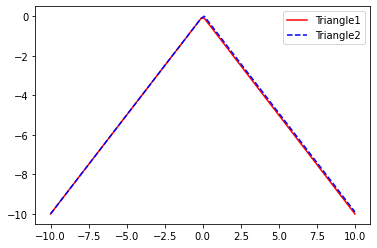

In [198]:
# Reset timers
start1,stop1,start2,stop2 = 0,0,0,0

# Varaibles
x = np.linspace(-10,10,100) # x[i] = 0 will be between i = 49 and 50
A = 1   # amplitude

# Initiate arrays
Triangle1 = np.zeros(len(x)) # needs to be the same length as x
Triangle2 = np.zeros(len(x)) # needs to be the same length as x

# for loop
start1 = tm.default_timer()

for i in range(len(x)):
    if x[i] < 0:
        Triangle1[i] = A*x[i]
    else:
        Triangle1[i] = -A*x[i]
        
stop1 = tm.default_timer()
        
# Binary

filter  = x < 0

start2 = tm.default_timer()

Triangle2[:50] = A*x[filter]
Triangle2[50:] = -A*x[filter]-10

stop2 = tm.default_timer()

# Plot 
plt.plot(x,Triangle1,'-',color = 'red', label = 'Triangle1')
plt.plot(x,Triangle2,'--',color = 'blue', label = 'Triangle2')
plt.legend()

# compare run times
total_time1 = stop1 - start1
total_time2 = stop2 - start2
speed = total_time1/total_time2
print('Computing a triangle function with for loops takes %1.3e s and with binary takes %1.3e s, binary is %1.3e times faster.' %(total_time1,total_time2,speed))

### Vector Operations

### Linear Tranformations

### Solving Systems of Equations